# Random MPC (state and input constrained)

```
xref = ones
uref = zeros
x0 = ones

umax = 5
xmax = 3

N = 10
Nmpc = 30

"fixed" random samples available for nx = 20, nu = 10 and nx = 8, nu = 4
```

## Problem definition

In [1]:
include("ex10_data.jl");

## Load PIPG tools

In [2]:
@load_file "pipg_suite.jl" true
@load_file "pipg_var.jl" true
@load_file "execute_utils.jl" true;

## Solve via JuMP

In [3]:
exe_utils.execute_JuMP!(:mosek)

Termination status: OPTIMAL

## Solve via PIPG

In [4]:
exe_utils.execute_PIPG!()

Total PIPG iterations          : 80
Norm of optimum                : 2.428690641364719
Distance to optimum (absolute) : 0.002716931573232717
Distance to optimum (relative) : 0.001118681616735687 
Dynamics error                 : 5.555464933530707e-5

(0.001118681616735687, 5.555464933530707e-5, 80)

## Benchmark PIPG

In [5]:
# using BenchmarkTools
exe_utils.execute_pipg_benchmark()

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     79.741 μs (0.00% GC)
  median time:      101.223 μs (0.00% GC)
  mean time:        103.935 μs (0.00% GC)
  maximum time:     405.159 μs (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [6]:
# using TimerOutputs
exe_utils.execute_pipg_timeit()

 ──────────────────────────────────────────────────────────────────
                           Time                   Allocations      
                   ──────────────────────   ───────────────────────
 Tot / % measured:      189ms / 1.05%           15.6MiB / 0.00%    

 Section   ncalls     time   %tot     avg     alloc   %tot      avg
 ──────────────────────────────────────────────────────────────────
 PIPG          20   1.98ms   100%  99.1μs     0.00B   - %     0.00B
 ──────────────────────────────────────────────────────────────────

## Diagnostic data

Power iteration estimate of σ  : 12.013299185321815
SVD estimate of σ              : 12.19710609857753

Total PIPG iterations          : 5000
Norm of optimum                : 2.428690641364719
Distance to optimum (absolute) : 1.1698506467094916e-5
Distance to optimum (relative) : 4.816795629648963e-6 
Dynamics error                 : 4.440892098500626e-16

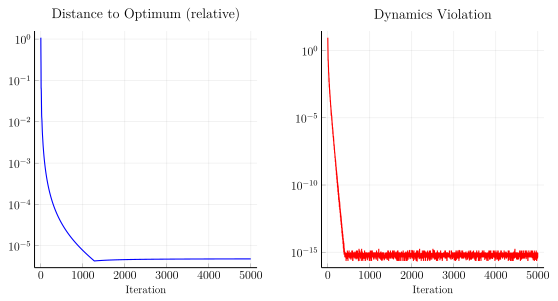

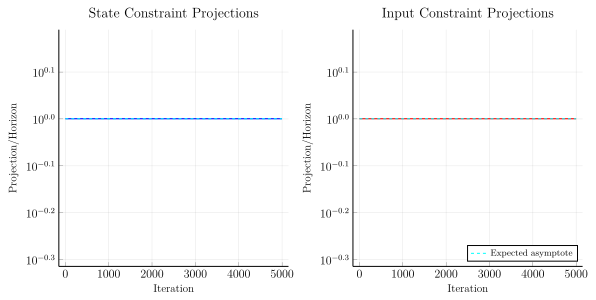

(4.816795629648963e-6, 4.440892098500626e-16, 5000)

In [7]:
exe_utils.execute_PIPG!(true)